In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("kabure/german-credit-data-with-risk")

In [ ]:
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/german-credit-data-with-risk


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(f"{path}/german_credit_data.csv")
print(df.head())


   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  


In [ ]:
df['Age'].describe()

,Age
count,1000.000000
mean,35.546000
std,11.375469
min,19.000000
25%,27.000000
50%,33.000000
75%,42.000000
max,75.000000


In [ ]:
df['Risk'].value_counts()

,count
Risk,
good,700
bad,300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Job'].unique()

array([2, 1, 3, 0])

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [ ]:
# df.duplicated().sum()  if present then df.drop_duplicates(inplace = "True")

In [ ]:
df = df.dropna().reset_index(drop = True)

In [ ]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
df.drop(columns = 'Unnamed: 0', inplace = True)

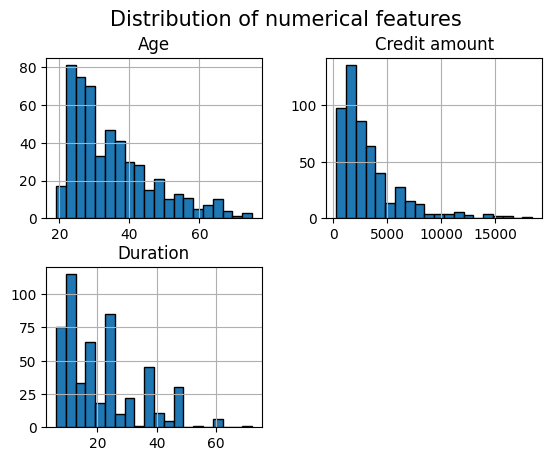

In [ ]:
df[['Age', 'Credit amount', 'Duration']].hist(bins = 20, edgecolor = 'black')
plt.suptitle('Distribution of numerical features', fontsize = 15)
plt.show()

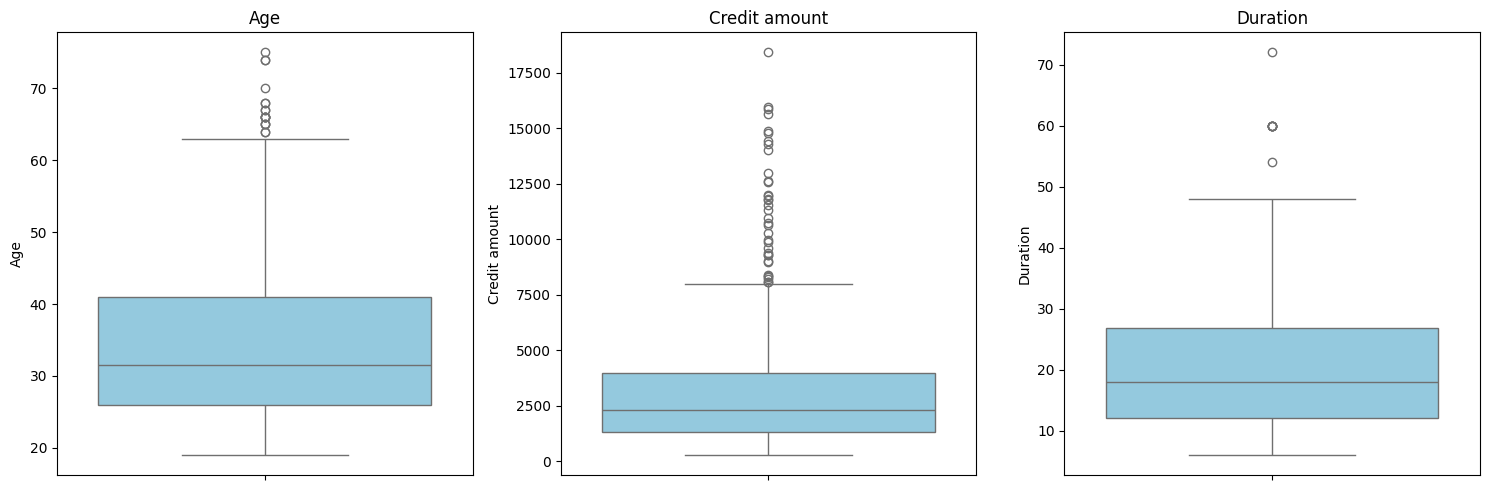

In [ ]:
plt.figure(figsize = (15, 5))
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
  plt.subplot(1, 3, i + 1)
  sns.boxplot(y = df[col], color = 'skyblue')
  plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
df.query('Duration > 70')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [ ]:
categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

/tmp/ipython-input-1771661639.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette = 'Set2', order = df[col].value_counts().index)
/tmp/ipython-input-1771661639.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette = 'Set2', order = df[col].value_counts().index)
/tmp/ipython-input-1771661639.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette = 'Set2', order = df[col].value_counts().index)
/tmp/ipython-input-1771661639.py:4: FutureWarning: 

Passing `palet

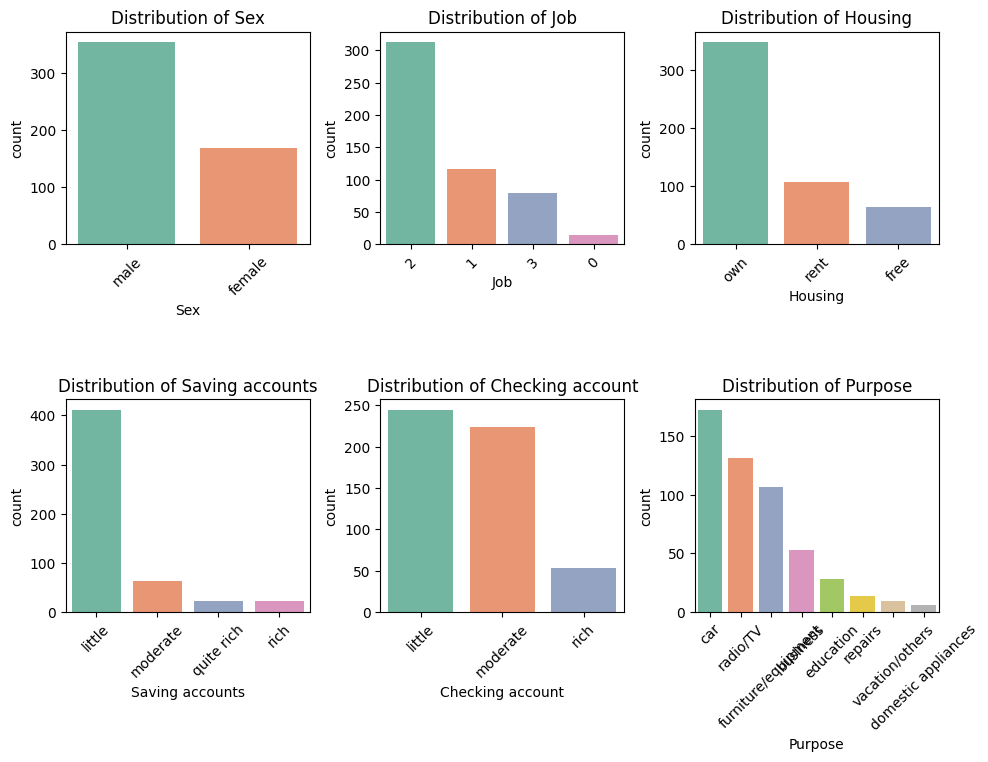

In [ ]:
plt.figure(figsize = (10, 10))
for i, col in enumerate(categorical_cols):
  plt.subplot(3, 3, i + 1)
  sns.countplot(data = df, x = col, palette = 'Set2', order = df[col].value_counts().index)
  # sns.countplot(x = df[col], palette = 'Set2', order = df[col].value_counts().index)
  plt.title(f"Distribution of {col}")
  plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

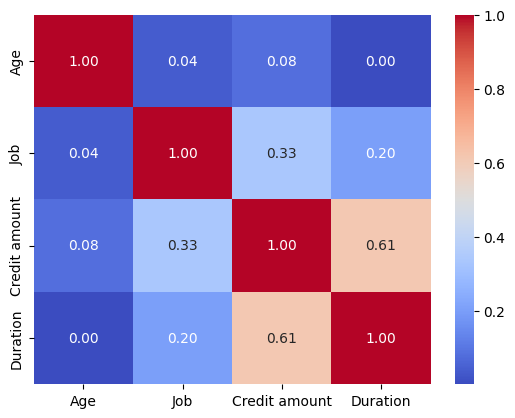

In [ ]:
corr = df[['Age', 'Job', 'Credit amount', 'Duration']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.show()

In [ ]:
df.groupby('Job')['Credit amount'].mean()

,Credit amount
Job,
0,1767.857143
1,2250.715517
2,3129.130990
3,5648.784810


In [ ]:
df.groupby('Sex')['Credit amount'].mean()

,Credit amount
Sex,
female,2937.202381
male,3440.833333


In [ ]:
df.pivot_table(values="Credit amount", index="Housing", columns="Purpose")
# pd.pivot_table(df, values="Credit amount", index="Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


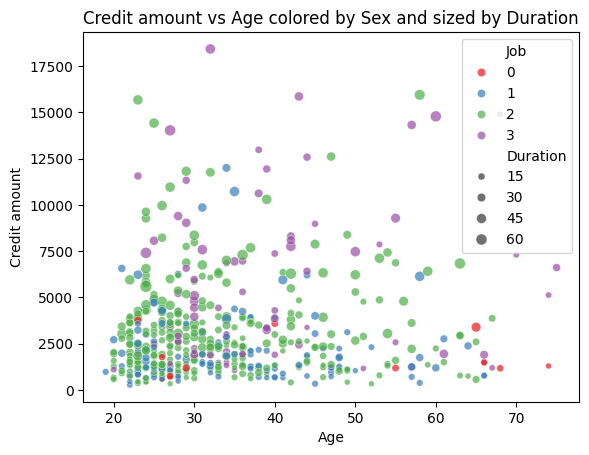

In [ ]:
sns.scatterplot(data = df, x = "Age", y = "Credit amount", hue = 'Job', size = 'Duration', alpha = 0.7, palette = 'Set1')
plt.title('Credit amount vs Age colored by Sex and sized by Duration')
plt.show()

/tmp/ipython-input-3716733347.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = 'Saving accounts', y = 'Credit amount', palette = 'Pastel1')


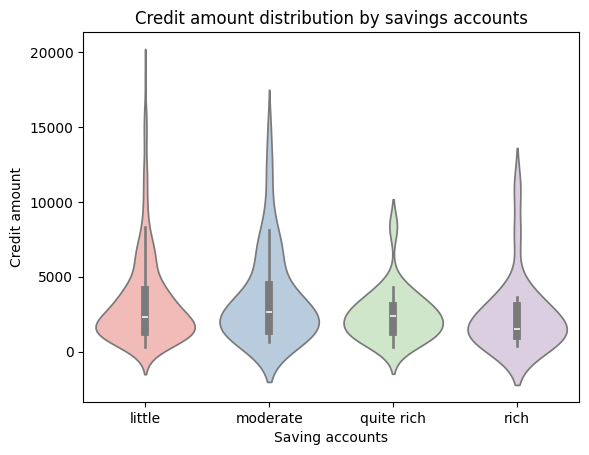

In [ ]:
sns.violinplot(data = df, x = 'Saving accounts', y = 'Credit amount', palette = 'Pastel1')
# sns.violinplot(data = df, y = 'Credit amount', hue = 'Saving accounts', palette = 'Pastel1')
plt.title('Credit amount distribution by savings accounts')
plt.show()

/tmp/ipython-input-2927025434.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x = 'Risk', palette="Pastel2")
/tmp/ipython-input-2927025434.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x = 'Risk', palette="Pastel2")
/tmp/ipython-input-2927025434.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x = 'Risk', palette="Pastel2")


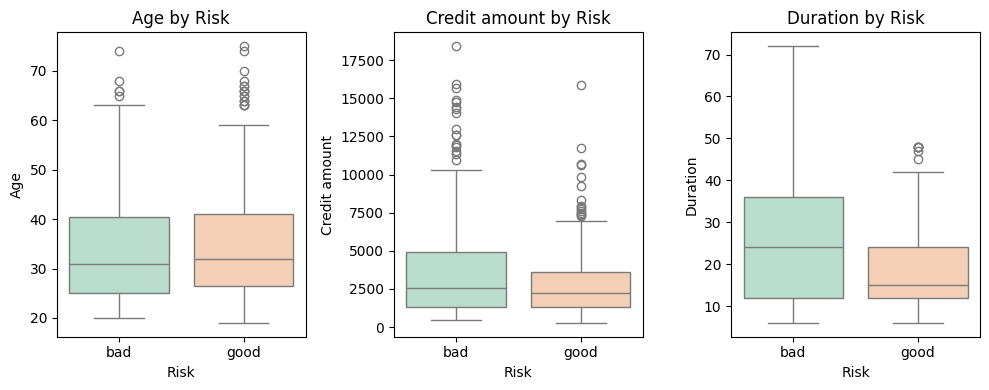

In [ ]:
# Import the necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# --- The Complete Code from Your Image ---

# 1. Create a figure to hold all the plots.
#    figsize=(10, 4) makes it 10 inches wide and 4 inches tall.
plt.figure(figsize=(10, 4))

# 2. Start a loop to create a plot for each column in the list.
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):

    # 3. Create a grid of subplots (1 row, 3 columns) and activate the next one.
    #    'i + 1' makes it activate subplot 1, then 2, then 3.
    plt.subplot(1, 3, i + 1)

    # 4. Draw the boxplot on the active subplot.
    #    x='Risk' splits the data into 'good' and 'bad' risk groups.
    #    y=col plots the distribution of the current column (e.g., 'Age') for each group.
    sns.boxplot(data=df, y=col, x = 'Risk', palette="Pastel2")

    # 5. Set the title for the current subplot (e.g., "Age by Risk").
    plt.title(f"{col} by Risk")

# 6. Automatically adjust the spacing between plots to prevent titles/labels from overlapping.
plt.tight_layout()

# 7. Display the final figure with all the plots.
plt.show()

In [ ]:
df.groupby('Risk')[['Age', 'Credit amount', 'Duration']].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


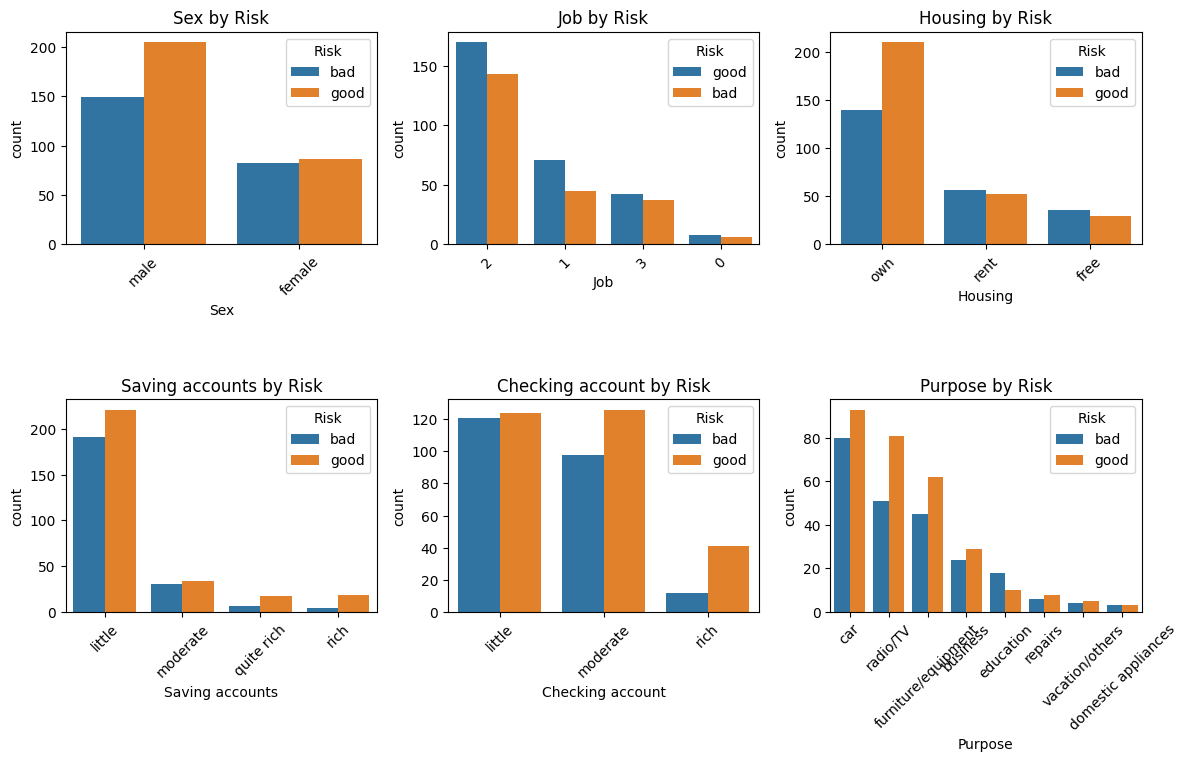

In [ ]:
plt.figure(figsize = (12, 10))
for i, col in enumerate(categorical_cols):
  plt.subplot(3, 3, i + 1)
  sns.countplot(data = df, x = col, hue = 'Risk', order = df[col].value_counts().index)
  # sns.boxplot(data = df, y = col)
  plt.title(f"{col} by Risk")
  plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']

In [ ]:
target = 'Risk'

In [ ]:
df_model = df[features + [target]].copy()
df_model

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad
...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,good
518,30,male,3,own,little,little,3959,36,good
519,40,male,3,own,little,little,3857,30,good
520,23,male,2,free,little,little,1845,45,bad


In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [ ]:
cat_cols = df_model.select_dtypes(include = 'object').columns.drop('Risk')

In [ ]:
le_dict = {}

In [ ]:
for col in cat_cols:
  le = LabelEncoder()
  df_model[col] = le.fit_transform(df_model[col])
  le_dict[col] = le
  joblib.dump(le, f"{col}_encoder.pkl")

In [ ]:
for col in cat_cols:
  le = LabelEncoder()
  df_model[col] = le.fit_transform(df_model[col])
  le_dict[col] = le
  joblib.dump(le, f"{col}_encoder_pkl")

In [ ]:
target

'Risk'

In [ ]:
le_target = LabelEncoder()

In [ ]:
df_model[target] = le_target.fit_transform(df_model[target])

In [ ]:
df_model[target].value_counts()

,count
Risk,
1,291
0,231


In [ ]:
joblib.dump(le_target, 'target_encoder.pkl')

['target_encoder.pkl']

In [ ]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_model.drop(target, axis = 1)
y = df_model[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
  grid = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
  grid.fit(X_train, y_train)
  best_model = grid.best_estimator_
  y_pred = best_model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  return best_model, acc, grid.best_params_

In [ ]:
dt = DecisionTreeClassifier(random_state = 1, class_weight = 'balanced')
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

In [ ]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

In [ ]:
print("best decision tree ", best_dt)
print("acc_dt ", acc_dt)
print("params_dt ", params_dt)

best decision tree  DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=1)
acc_dt  0.580952380952381
params_dt  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
rf = RandomForestClassifier(random_state=1, class_weight="balanced", n_jobs=-1)
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [ ]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [ ]:
print("best random forest ", best_rf)
print("acc_rf ", acc_rf)
print("params_rf ", params_rf)

best random forest  RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=10, n_jobs=-1, random_state=1)
acc_rf  0.6190476190476191
params_rf  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
et = ExtraTreesClassifier(random_state=1, class_weight="balanced", n_jobs=-1)
et_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [ ]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [ ]:
print("best extra tree ", best_et)
print("acc_et ", acc_et)
print("params_et ", params_et)

best extra tree  ExtraTreesClassifier(class_weight='balanced', max_depth=10, min_samples_leaf=2,
                     min_samples_split=5, n_jobs=-1, random_state=1)
acc_et  0.6476190476190476
params_et  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
count_good = (y_train == 1).sum()
count_bad = (y_train == 0).sum()
scale_pos_weight = count_good / count_bad
xgb = XGBClassifier(
    random_state=1,
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight
)
xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1],
    "colsample_bytree": [0.7, 1]
}

In [ ]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:59:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
print("best XG boost ", best_xgb)
print("acc_xgb ", acc_xgb)
print("params_xgb ", params_xgb)

best XG boost  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)
acc_xgb  0.6666666666666666
params_xgb  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
